In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
import yfinance as yf

# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

In [ ]:
#importing data
START = "2020-01-01"
END = "2022-01-12"
data = yf.download('AAPL', start=START, end=END)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200
...,...,...,...,...,...
2022-01-05,171.686722,176.839679,171.411899,176.290033,94537600
2022-01-06,168.820709,172.059714,168.467363,169.507767,96904000


In [ ]:
import pandas as pd

# Read your raw CSV or transformed Excel
df = pd.DataFrame(data)

# Rename columns if needed
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df['Ticker'] = 'AAPL'

# Reorder columns
df = df[['Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]


In [ ]:
# Implementing MACD
df['MACD'] = df.Close.ewm(span = 12, adjust = False).mean() - df.Close.ewm(span = 26, adjust = False).mean()
df['Signal_MACD'] = df.MACD.ewm(span = 9, adjust = False).mean()
df

,Ticker,Open,High,Low,Close,Volume,MACD,Signal_MACD
Date,,,,,,,,
2020-01-02,AAPL,71.627092,72.681289,71.373218,72.620842,135480400,0.000000,0.000000
2020-01-03,AAPL,71.847118,72.676447,71.689957,71.914818,146322800,-0.056321,-0.011264
2020-01-06,AAPL,71.034717,72.526541,70.783256,72.487854,118387200,-0.054093,-0.019830
2020-01-07,AAPL,72.497529,72.753823,71.926915,72.146942,108872000,-0.078926,-0.031649
2020-01-08,AAPL,71.849533,73.609745,71.849533,73.307510,132079200,-0.004902,-0.026300
...,...,...,...,...,...,...,...,...
2022-01-05,AAPL,176.290033,176.839679,171.411899,171.686722,94537600,4.055608,4.684623
2022-01-06,AAPL,169.507767,172.059714,168.467363,168.820709,96904000,3.358050,4.419308
2022-01-07,AAPL,169.694241,170.921136,167.868622,168.987549,86709100,2.786571,4.092761


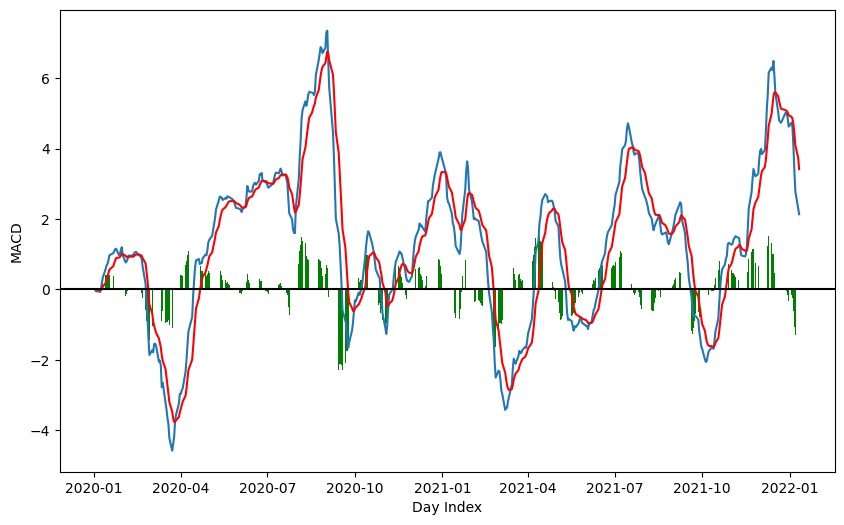

In [ ]:
#plotting
plt.figure(figsize = (10, 6))
plt.plot(df.MACD)
plt.plot(df.Signal_MACD, color = "Red")

plt.axhline(y = 0, color = "Black", linestyle='-')  # BaseLine
plt.bar(df.index, df.MACD - df.Signal_MACD, color="Green", width = 0.6)
plt.xlabel("Day Index")
plt.ylabel("MACD")
plt.show()

In [ ]:
df['Change'] = df['Close'].diff()
df['up'] = df['Change'].apply(lambda x: x if x > 0 else 0)
df['down'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)
avg_gain = df['up'].rolling(window=14).mean()
avg_loss = df['down'].rolling(window=14).mean()
rs = avg_gain / avg_loss
rs[avg_loss == 0] = 0
df['RSI'] = 100 - (100 / (1 + rs))
df = df.fillna(0)
df

,Ticker,Open,High,Low,Close,Volume,MACD,Signal_MACD,Change,up,down,RSI
Date,,,,,,,,,,,,
2020-01-02,AAPL,71.627092,72.681289,71.373218,72.620842,135480400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,AAPL,71.847118,72.676447,71.689957,71.914818,146322800,-0.056321,-0.011264,-0.706024,0.000000,0.706024,0.000000
2020-01-06,AAPL,71.034717,72.526541,70.783256,72.487854,118387200,-0.054093,-0.019830,0.573036,0.573036,0.000000,0.000000
2020-01-07,AAPL,72.497529,72.753823,71.926915,72.146942,108872000,-0.078926,-0.031649,-0.340912,0.000000,0.340912,0.000000
2020-01-08,AAPL,71.849533,73.609745,71.849533,73.307510,132079200,-0.004902,-0.026300,1.160568,1.160568,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,AAPL,176.290033,176.839679,171.411899,171.686722,94537600,4.055608,4.684623,-4.691635,0.000000,4.691635,43.670545
2022-01-06,AAPL,169.507767,172.059714,168.467363,168.820709,96904000,3.358050,4.419308,-2.866013,0.000000,2.866013,49.573554
2022-01-07,AAPL,169.694241,170.921136,167.868622,168.987549,86709100,2.786571,4.092761,0.166840,0.166840,0.000000,51.744000


In [ ]:
df['Signal'] = 0

for i in range(len(df)):
  E = 0.1
  # Buying
  if(abs(df.High[i] - df.Close[i]) < E and abs(df.Open[i] - df.Low[i]) < E and df.RSI[i] < 70):
    df.Signal[i] = 1
  if(df.MACD[i] > df.Signal_MACD[i] and df.RSI[i] < 70):
    df.Signal[i] = 1

  # Selling
  if(abs(df.Open[i] - df.High[i]) < E and abs(df.Low[i] - df.Close[i]) < E and df.RSI[i] > 30):
    df.Signal[i] = -1
  if(df.MACD[i] < df.Signal_MACD[i] and df.RSI[i] > 30):
    df.Signal[i] = -1

df

,Ticker,Open,High,Low,Close,Volume,MACD,Signal_MACD,Change,up,down,RSI,Signal
Date,,,,,,,,,,,,,
2020-01-02,AAPL,71.627092,72.681289,71.373218,72.620842,135480400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2020-01-03,AAPL,71.847118,72.676447,71.689957,71.914818,146322800,-0.056321,-0.011264,-0.706024,0.000000,0.706024,0.000000,0
2020-01-06,AAPL,71.034717,72.526541,70.783256,72.487854,118387200,-0.054093,-0.019830,0.573036,0.573036,0.000000,0.000000,0
2020-01-07,AAPL,72.497529,72.753823,71.926915,72.146942,108872000,-0.078926,-0.031649,-0.340912,0.000000,0.340912,0.000000,0
2020-01-08,AAPL,71.849533,73.609745,71.849533,73.307510,132079200,-0.004902,-0.026300,1.160568,1.160568,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05,AAPL,176.290033,176.839679,171.411899,171.686722,94537600,4.055608,4.684623,-4.691635,0.000000,4.691635,43.670545,-1
2022-01-06,AAPL,169.507767,172.059714,168.467363,168.820709,96904000,3.358050,4.419308,-2.866013,0.000000,2.866013,49.573554,-1
2022-01-07,AAPL,169.694241,170.921136,167.868622,168.987549,86709100,2.786571,4.092761,0.166840,0.166840,0.000000,51.744000,-1


In [ ]:
initial_portfolio = 1000  # initial portfolio
cp = initial_portfolio  # current portfolio
portion = 0.8 # Portion of portfolio to be used
trading = 0  # Stores the status of trading
profit, loss = [], [] # profit and loss values
entry, exit = [], []  #  entry and exit indices
duration = []  # duration of the trade
returns = []  # returns of the trade
drawdown = [] # drawdown values for each trade
portfolio = []  # porfolio value after each trade
portfolio.append(cp)
tp = 0.07
sl = 0.02

# Only a single trade can be active at a time
for i in range(len(df)):

  # No trade is open right now
  if (trading == 0):
    if(df.Signal[i] == 1):
      cost = df.Close[i] # Store the buy price
      trading = 1
      entry.append(i)
      Take = (1 + tp) * df.Close[i]
      Stop = (1 - sl) * df.Close[i]

    elif (df.Signal[i] == -1):
      cost = df.Close[i]
      trading = -1
      entry.append(i)
      Take = (1 - tp) * df.Close[i]
      Stop = (1 + sl) * df.Close[i]

  elif (trading == 1):  # We need to sell the stock now

    if(df.Close[i] >= Take):
      p1 = (df.Close[i] - cost) / cost * portion * cp
      returns.append(p1 / cp* 100)
      profit.append(p1)
      cp+= p1
      trading = 0 #no trade mode
      exit.append(i)
      duration.append(i - entry[-1])  # Current index - Last Index of entry list
      # We find the minimum clsoing value from the entry to the exit indices of the trade just closed, and use the formula for drawdown
      drawdown.append((min(df.Close[entry[-1]:exit[-1]]) - df.Close[entry[-1]]) / df.Close[entry[-1]] * 100)
      portfolio.append(cp)

    elif(df.Close[i] <= Stop):
      l1 = ((df.Close[i] - cost) / cost) * portion * cp
      returns.append(l1 / cp * 100)
      loss.append(l1)
      cp += l1
      trading = 0
      exit.append(i)
      duration.append(i - entry[-1])
      drawdown.append((min(df.Close[entry[-1]:exit[-1]]) - df.Close[entry[-1]]) / df.Close[entry[-1]] * 100)
      portfolio.append(cp)

  elif (trading == -1): # We need to buy back the stock now

    if(df.iloc[i]['Close'] <= Take):
      p2 = (((cost - df.Close[i]) / cost) * portion * cp)
      profit.append(p2)
      cp += p2
      trading = 0
      exit.append(i)
      returns.append((p2 / cp) * 100)
      duration.append(i - entry[-1])
      drawdown.append((min(df.Close[entry[-1]:exit[-1]]) - df.Close[entry[-1]]) / df.Close[entry[-1]] * 100)
      portfolio.append(cp)

    elif (df.Close[i] >= Stop):
      l2 = (((cost - df.Close[i]) / cost) * portion * cp)
      loss.append(l2)
      cp += l2
      trading = 0
      exit.append(i)
      returns.append((l2 / cp) * 100)
      duration.append(i - entry[-1])
      drawdown.append((min(df.Close[entry[-1]:exit[-1]]) - df.Close[entry[-1]]) / df.Close[entry[-1]] * 100)
      portfolio.append(cp)

# If a trade is still open at the end of the df, close it with the current close price
if (trading != 0):
  current_close_price = df.Close[-1]
  if(trading == 1):
    gain = (((current_close_price - cost) / cost) * portion * cp)
  else:
    gain = (((cost - current_close_price) / cost) * portion * cp)

  if gain > 0:
    profit.append(gain)
  else:
    loss.append(gain)

  cp += gain
  exit.append(len(df) - 1)
  returns.append((gain / cp) * 100)
  duration.append(len(df) - 1 - entry[-1])
  drawdown.append((min(df.Close[entry[-1]:exit[-1]]) - df.Close[entry[-1]]) / df.Close[entry[-1]] * 100)
  portfolio.append(cp)


all_trades = profit + loss
sharpe = math.sqrt(len(all_trades)) * ((np.mean(all_trades) - 0.0423) / np.std(all_trades))
print("Total Closed Trades: ", len(profit) + len(loss))
print("Winning Trades: ", len(profit))
print("Losing Trades: ", len(loss))

print("Largest Losing Trade: ", min(loss))
print("Largest winning trade: ", max(profit))

print("Sharpe Ratio: ", sharpe)
print("Final Portfolio Value:", cp)
print("Initial Portfolio Value:", initial_portfolio)

print("Maximum Drawdown in percentage: ", str(min(drawdown)), "%")
print("Net Returns % : ", str(cp / initial_portfolio * 100 - 100), "%")

Total Closed Trades:  58
Winning Trades:  26
Losing Trades:  32
Largest Losing Trade:  -126.59572240880401
Largest winning trade:  172.63443188322938
Sharpe Ratio:  2.039498888424022
Final Portfolio Value: 2358.069467974583
Initial Portfolio Value: 1000
Maximum Drawdown in percentage:  -6.667772361213946 %
Net Returns % :  135.8069467974583 %


In [ ]:
# Making the trade log
trade_log = pd.DataFrame({
  'Entry Index': entry,
  'Exit Index': exit,
  'Duration': duration,
  'Returns %': returns,
  'Max Drawdown %': drawdown
})
trade_log

,Entry Index,Exit Index,Duration,Returns %,Max Drawdown %
0,4,24,20,5.810201,0.000000
1,25,34,9,-1.744844,-0.321857
2,35,38,3,6.205558,-3.387202
3,40,45,5,8.036381,-3.273004
4,46,48,2,9.423935,-3.473075
5,49,50,1,9.331387,0.000000
6,51,54,3,6.953296,-3.195426
7,55,56,1,-8.726413,0.000000
8,57,58,1,-4.394849,0.000000
9,59,62,3,-2.205538,0.000000


1.3663145194891915


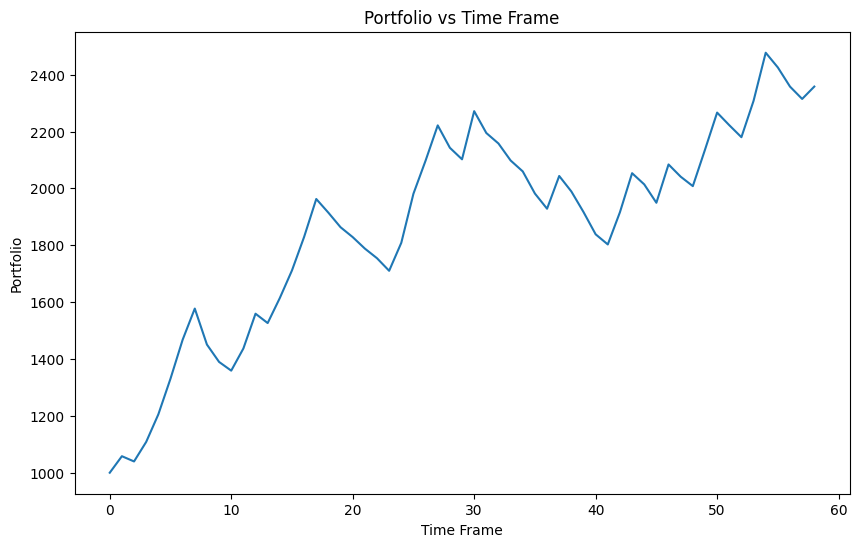

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(portfolio)
plt.title("Portfolio vs Time Frame")
plt.xlabel("Time Frame")
plt.ylabel("Portfolio")
print((df['Close'][-1]-df['Close'][0])/df['Close'][0])
plt.show()